In [142]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [143]:
pd.set_option('display.max_columns', None)

In [144]:
df=pd.read_csv('../data/clean/startup_data_clean2.csv')
df.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,success
0,CA,San Diego,Bandsintown,1/1/2007,active,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,1
1,CA,Los Gatos,TriCipher,1/1/2000,active,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1
2,CA,San Diego,Plixi,3/18/2009,active,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,1
3,CA,Cupertino,Solidcore Systems,1/1/2002,active,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,1
4,CA,San Francisco,Inhale Digital,8/1/2010,notactive,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0


In [145]:
df['success'].value_counts()

1    588
0    335
Name: success, dtype: int64

In [146]:
df['is_acquired'].value_counts()

1    597
0    326
Name: is_acquired, dtype: int64

In [147]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [148]:
df

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,success
0,CA,San Diego,Bandsintown,1/1/2007,active,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,1
1,CA,Los Gatos,TriCipher,1/1/2000,active,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1
2,CA,San Diego,Plixi,3/18/2009,active,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,1
3,CA,Cupertino,Solidcore Systems,1/1/2002,active,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,1
4,CA,San Francisco,Inhale Digital,8/1/2010,notactive,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,CoTweet,1/1/2009,active,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,1,1
919,MA,Burlington,Reef Point Systems,1/1/1998,notactive,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,0,0
920,CA,Sunnyvale,Paracor Medical,1/1/1999,notactive,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,0,0
921,CA,San Francisco,Causata,1/1/2009,active,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1,1


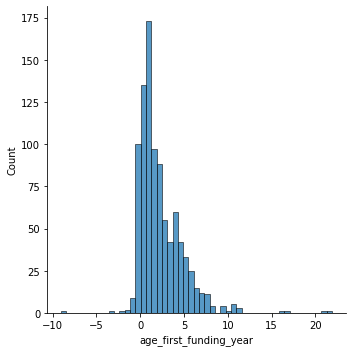

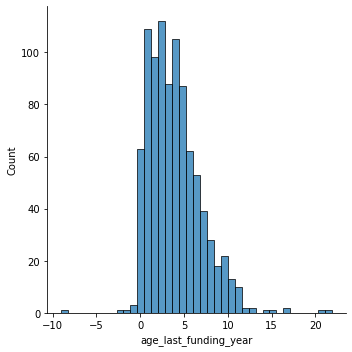

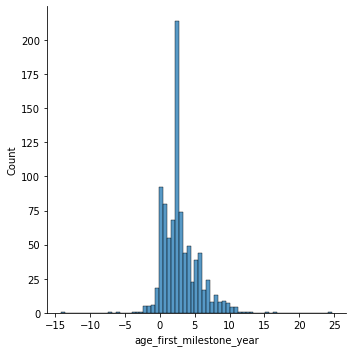

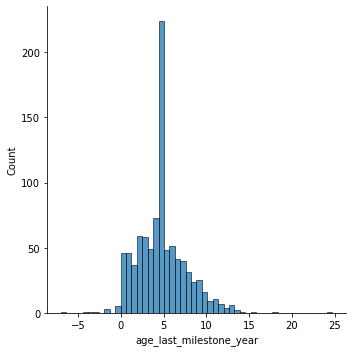

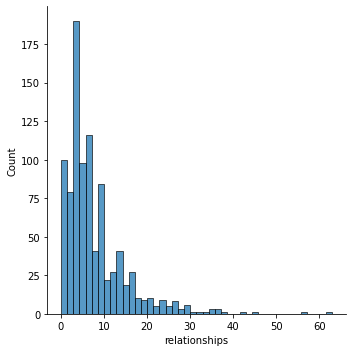

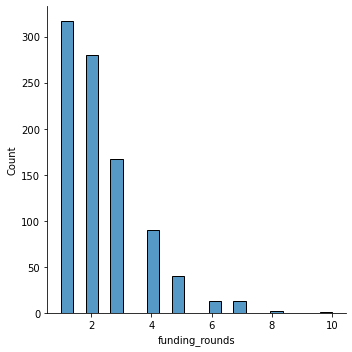

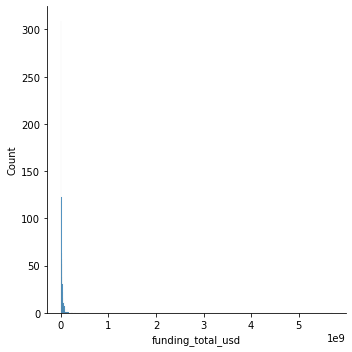

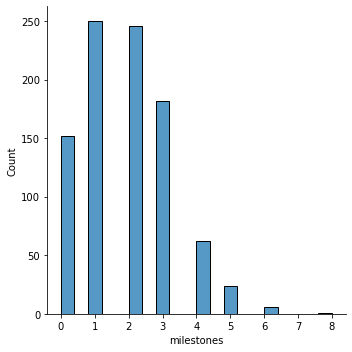

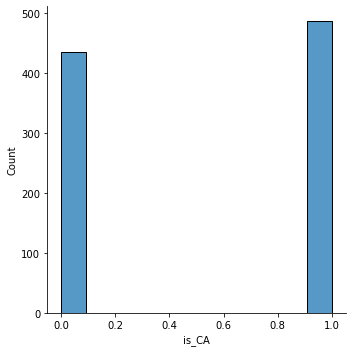

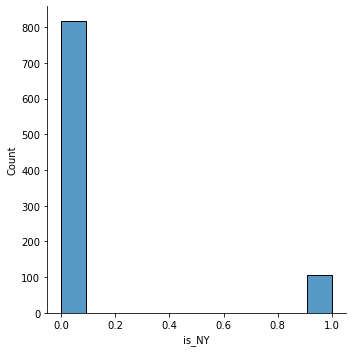

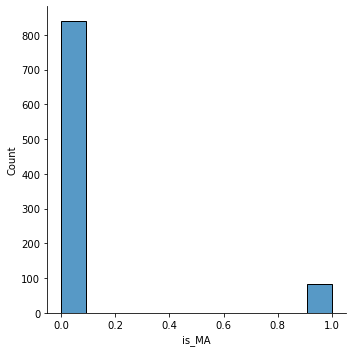

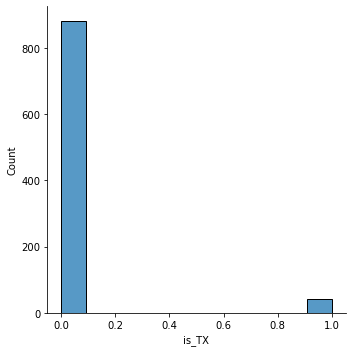

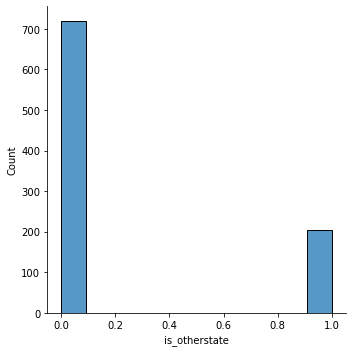

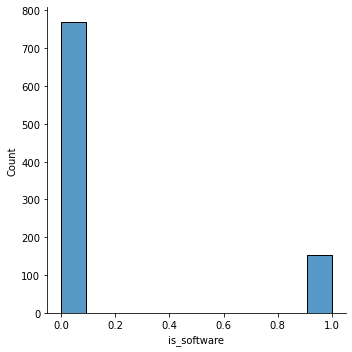

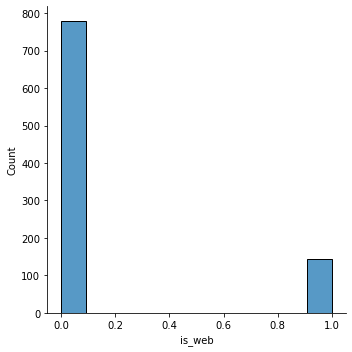

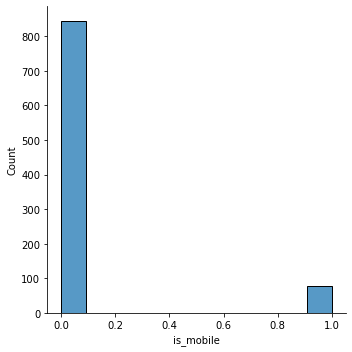

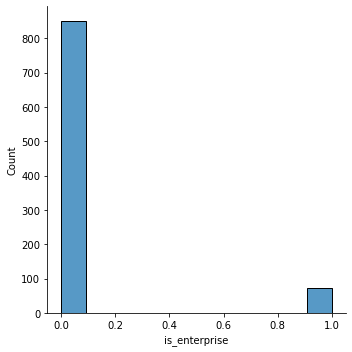

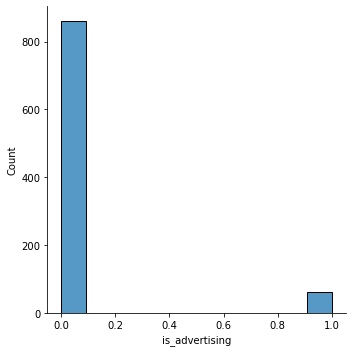

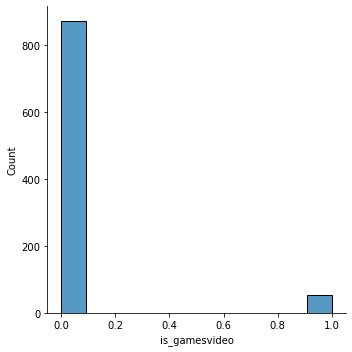

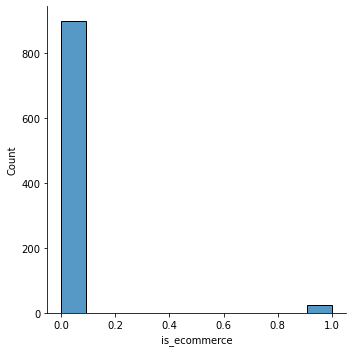

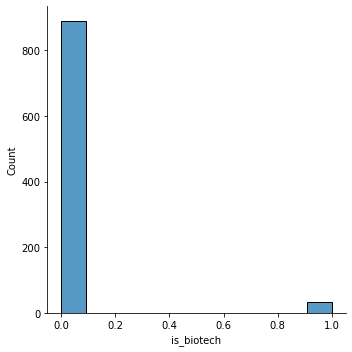

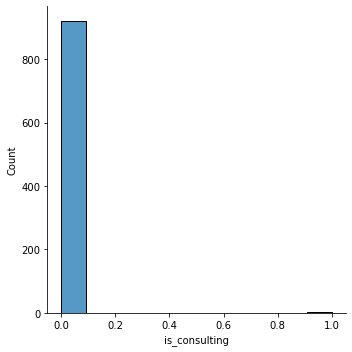

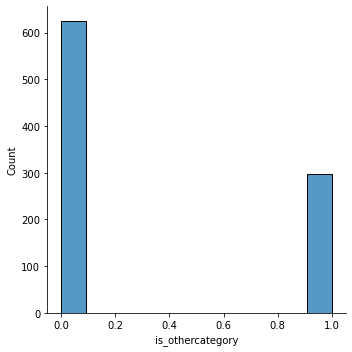

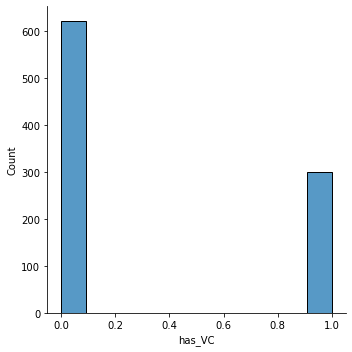

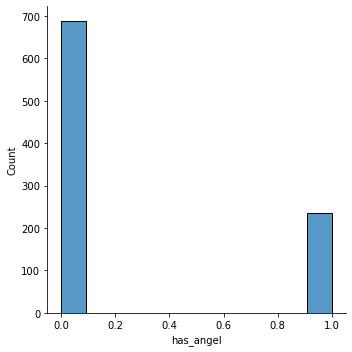

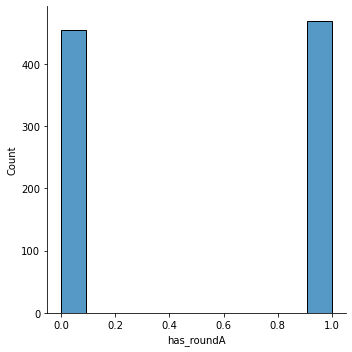

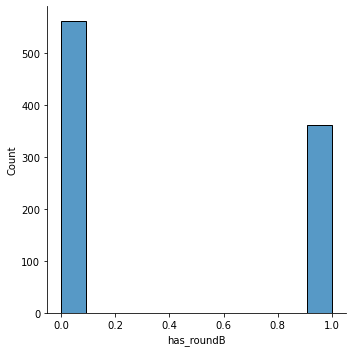

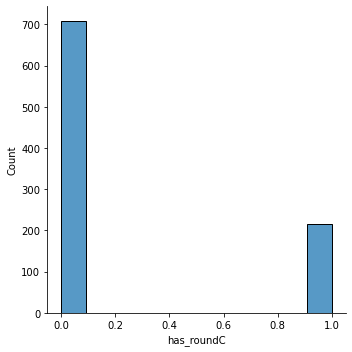

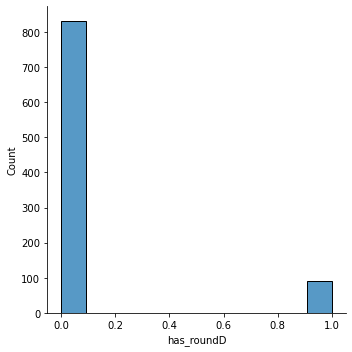

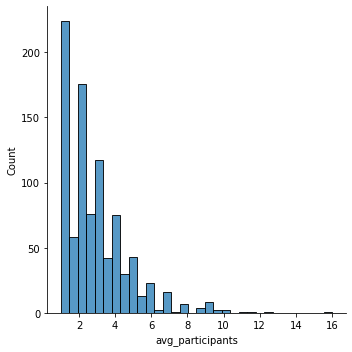

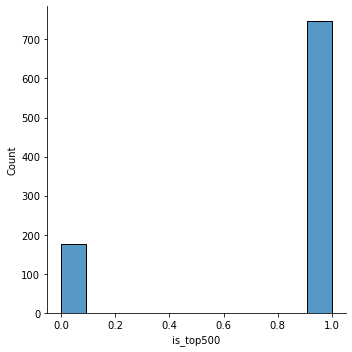

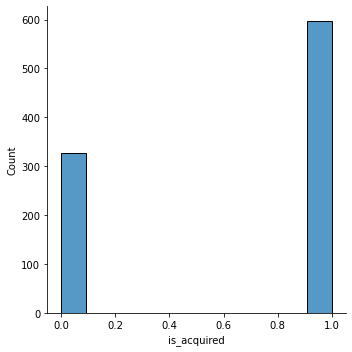

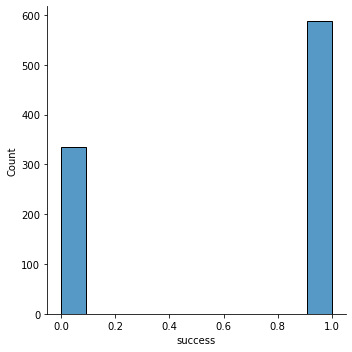

In [149]:
for column_name in df_num:
    sns.displot(df_num[column_name])
    plt.show()

### Split X/Y

In [81]:
y=df_num['success']
X=df_num.drop(['success'], axis=1)

### Train and Test

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [83]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (738, 32)
Shape of the y Train : (738,)
Shape of the X test : (185, 32)
Shape of the y test : (185,)


In [84]:
X_train

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
287,1.9342,4.0438,2.0027,10.1890,2,2,24300000,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2.5,1,1
174,3.1479,4.8795,5.0027,5.0027,5,2,14000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0,1,1
516,2.7753,5.0027,4.1644,10.7534,2,3,17400000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,5.0,1,1
189,0.7397,1.1425,0.5808,0.5808,15,2,15700000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3.0,1,1
787,0.0000,0.0000,0.0000,0.0000,2,1,250000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1.9260,1.9260,1.6685,2.4658,1,1,12000000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,1,1
871,6.2986,6.2986,6.0027,6.0027,9,1,15000000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0,1,1
835,4.0795,4.0795,2.5205,4.4767,0,1,4000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0,1,0
792,0.0822,0.8384,0.0000,4.1836,4,2,4500000,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,5.5,1,0


Splitting, correct imbalancing and then standard scalling the numericals

In [85]:
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [86]:
print("Shape of the X Train_res :", X_train_res.shape)
print("Shape of the y Train :", y_train_res.shape)

Shape of the X Train_res : (934, 32)
Shape of the y Train : (934,)


In [87]:
X_train_res

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,1.9342,4.0438,2.0027,10.1890,2,2,24300000,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2.5,1,1
1,3.1479,4.8795,5.0027,5.0027,5,2,14000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0,1,1
2,2.7753,5.0027,4.1644,10.7534,2,3,17400000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,5.0,1,1
3,0.7397,1.1425,0.5808,0.5808,15,2,15700000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3.0,1,1
4,0.0000,0.0000,0.0000,0.0000,2,1,250000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1.0685,1.0685,0.8384,3.9918,4,1,4300000,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2.0,1,0
930,0.7479,0.7479,2.5205,4.4767,3,2,100000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,0,0
931,4.3151,5.8301,2.5205,4.4767,1,2,16000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3.0,1,0
932,5.7836,5.7836,2.0027,2.0027,1,1,10000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3.0,1,0


In [88]:
X_train_res.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
count,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,9.340000e+02,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,2.293440,3.899282,2.893422,4.601794,6.801927,2.260171,2.485987e+07,1.745182,0.524625,0.107066,0.097430,0.049251,0.220557,0.164882,0.147752,0.082441,0.066381,0.069593,0.064240,0.023555,0.041756,0.002141,0.337259,0.345824,0.239829,0.493576,0.373662,0.225910,0.092077,2.734810,0.779443,0.513919
std,2.565936,3.024123,2.785384,2.920063,6.673712,1.411095,1.883734e+08,1.330391,0.499661,0.309363,0.296702,0.216507,0.414844,0.371273,0.355044,0.275183,0.249081,0.254596,0.245311,0.151738,0.200138,0.046250,0.473027,0.475891,0.427208,0.500227,0.484035,0.418404,0.289290,1.787948,0.414844,0.500074
min,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.581500,1.594500,1.028075,2.887000,2.000000,1.000000,2.600000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.456200,3.343850,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.333300,1.000000,1.000000
75%,3.646575,5.642450,4.002700,5.937625,9.000000,3.000000,2.445000e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.500000,1.000000,1.000000
max,21.895900,21.895900,24.684900,24.684900,57.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [89]:
y_train_res.value_counts()

1    467
0    467
Name: success, dtype: int64

##### Imbalanced is fixed, but I still need to work on standarization of the other columns

In [90]:
X_train_num = X_train_res.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [91]:
X_train_norm

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,0.354878,0.423056,0.416232,0.492567,0.035088,0.111111,0.004261,0.375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.100000,1.0,1.0
1,0.394102,0.450064,0.493442,0.311019,0.087719,0.111111,0.002454,0.125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.066667,1.0,1.0
2,0.382060,0.454045,0.471867,0.512324,0.035088,0.222222,0.003051,0.250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.266667,1.0,1.0
3,0.316274,0.329291,0.379636,0.156229,0.263158,0.111111,0.002752,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.133333,1.0,1.0
4,0.292368,0.292368,0.364689,0.135898,0.035088,0.000000,0.000042,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.326900,0.326900,0.386266,0.275632,0.070175,0.000000,0.000752,0.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.066667,1.0,0.0
930,0.316539,0.316539,0.429558,0.292606,0.052632,0.111111,0.000016,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
931,0.431824,0.480785,0.429558,0.292606,0.017544,0.111111,0.002805,0.000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.133333,1.0,0.0
932,0.479283,0.479283,0.416232,0.206003,0.017544,0.000000,0.001752,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.133333,1.0,0.0


In [92]:
X_train_norm.shape

(934, 32)

In [93]:
# remember: y = df['is_acquired'], y_train selected in train_test_split
X_train_transformed = X_train_norm

In [94]:
X_train_transformed

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,0.354878,0.423056,0.416232,0.492567,0.035088,0.111111,0.004261,0.375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.100000,1.0,1.0
1,0.394102,0.450064,0.493442,0.311019,0.087719,0.111111,0.002454,0.125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.066667,1.0,1.0
2,0.382060,0.454045,0.471867,0.512324,0.035088,0.222222,0.003051,0.250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.266667,1.0,1.0
3,0.316274,0.329291,0.379636,0.156229,0.263158,0.111111,0.002752,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.133333,1.0,1.0
4,0.292368,0.292368,0.364689,0.135898,0.035088,0.000000,0.000042,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.326900,0.326900,0.386266,0.275632,0.070175,0.000000,0.000752,0.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.066667,1.0,0.0
930,0.316539,0.316539,0.429558,0.292606,0.052632,0.111111,0.000016,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
931,0.431824,0.480785,0.429558,0.292606,0.017544,0.111111,0.002805,0.000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.133333,1.0,0.0
932,0.479283,0.479283,0.416232,0.206003,0.017544,0.000000,0.001752,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.133333,1.0,0.0


In [95]:
## now the test
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_test_num) # need to keep transformer
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

### Logistic Regression classification

In [96]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_transformed, y_train_res)

LogisticRegression(multi_class='multinomial', random_state=0)

In [134]:
y_test_pred = classification.predict(X_test_norm)




In [135]:
Logistic_Regression_classification_accuracy= classification.score(X_test_norm, y_test) # Accuracy for classification models and R2 for regression mnodels
Logistic_Regression_classification_accuracy

0.9945945945945946

In [99]:
confusion_matrix(y_test, y_test_pred)

array([[  0,  64],
       [  0, 121]], dtype=int64)

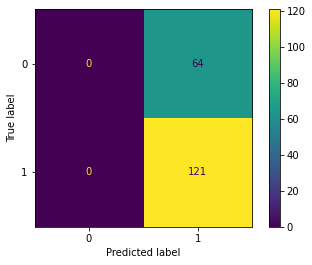

In [100]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

By the confusion matrix, True positive is more than double of False positive, fp is still significant which can affect the decision making of a start-up to invest.

In [101]:
cohen_kappa_score(y_test, y_test_pred)

0.0

The cohen kappa as 0 shows that there is random agreement among raters

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.65      1.00      0.79       121

    accuracy                           0.65       185
   macro avg       0.33      0.50      0.40       185
weighted avg       0.43      0.65      0.52       185



c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Even correcting the imbalancing before predicting is possible to see that the model is very good to predict if the start-up will be acquired but not so good that the start-up will not be acquired.

### Decision Tree

First parameters:

In [103]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 6)
regr.fit(X_train_transformed, y_train_res)


DecisionTreeRegressor(max_depth=10, max_features=6)

In [136]:
y_pred_dt_te = regr.predict(X_test_norm)

In [105]:
y_pred_dt_tr = regr.predict(X_train)

In [137]:
print("The R2 for the Decision Tree (fp) in the TRAIN set is {:.2f}".format(regr.score(X_train_transformed, y_train_res)))
print("The R2 for the Decision Tree (fp) in the TEST  set is {:.2f}".format(regr.score(X_test_norm, y_pred_dt_te)))

The R2 for the Decision Tree (fp) in the TRAIN set is 1.00
The R2 for the Decision Tree (fp) in the TEST  set is 1.00


In [107]:
results1 = cross_validate(regr,X_train_transformed, y_train_res, cv = 5)
results1

{'fit_time': array([0.00329709, 0.00433874, 0.00401735, 0.006001  , 0.00300074]),
 'score_time': array([0.0030148 , 0.00199795, 0.0030055 , 0.00300097, 0.0030005 ]),
 'test_score': array([0.9281874 , 0.90633609, 0.30960447, 0.80517789, 1.        ])}

In [108]:
cross_val_scores1 = cross_val_score(regr, X_train_transformed, y_train_res, cv=10)
print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores1)))

The mean R2 of the folds was 0.77


In [109]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_dt_te)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_dt_te)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_dt_te)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_dt_te)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_dt_te)))

The accuracy in the TEST set is: 0.81
The precision in the TEST set is: 0.89
The recall in the TEST set is: 0.80
The F1 in the TEST set is: 0.84
The Kappa in the TEST set is: 0.59


Second parameters:

In [110]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(X_train_transformed,y_train_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [138]:
y_pred_dt2_te = classifier.predict(X_test_norm)

In [112]:
y_pred_dt2_tr = classifier.predict(X_train)

In [113]:
cm_dt2 = confusion_matrix(y_test, y_pred_dt2_te)
cm_dt2

array([[ 63,   1],
       [  0, 121]], dtype=int64)

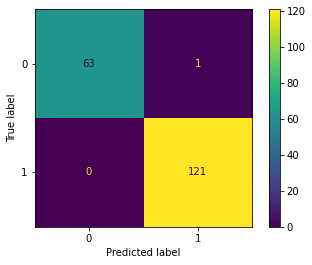

In [114]:
cm_dt2 = confusion_matrix(y_test, y_pred_dt2_te)

disp = ConfusionMatrixDisplay(cm_dt2,display_labels=classification.classes_)
disp.plot()
plt.show()

In [115]:
print("Train data R2 was: {:.2f}".format(classifier.score(X_train_transformed, y_train_res)))
print("Test data R2 was: {:.2f}".format(classifier.score(X_test, y_pred_dt2_te)))


Train data R2 was: 1.00
Test data R2 was: 1.00


In [116]:
results2 = cross_validate(classifier,X_train_transformed, y_train_res, cv = 5)
results2

{'fit_time': array([0.0093255 , 0.0068059 , 0.00870514, 0.00828528, 0.00514436]),
 'score_time': array([0.00238919, 0.00353909, 0.00200415, 0.0020566 , 0.00295663]),
 'test_score': array([0.97860963, 0.99465241, 0.98395722, 0.98930481, 0.98924731])}

In [117]:
cross_val_scores2 = cross_val_score(classifier, X_train_transformed, y_train_res, cv=10)
print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores2)))

The mean R2 of the folds was 0.99


In [118]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_dt2_te)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_dt2_te)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_dt2_te)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_dt2_te)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_dt2_te)))

The accuracy in the TEST set is: 0.99
The precision in the TEST set is: 0.99
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 1.00
The Kappa in the TEST set is: 0.99


In [119]:
decision_tree_accuracy= accuracy_score(y_test,y_pred_dt2_te)
decision_tree_accuracy

0.9945945945945946

### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_transformed, y_train_res)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_transformed, y_train_res)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))


The R2 for the Random Forest in the TRAIN set is 0.99
The R2 for the Random Forest in the TEST  set is 0.99


1    121
0     64
Name: success, dtype: int64

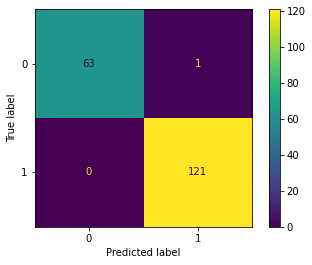

In [139]:
y_pred_rf = clf.predict(X_test_norm)
display(y_test.value_counts())
cm_rf=confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_rf)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_rf)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_rf)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_rf)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_rf)))

The accuracy in the TEST set is: 0.99
The precision in the TEST set is: 0.99
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 1.00
The Kappa in the TEST set is: 0.99


In [123]:
random_forest_accuracy=accuracy_score(y_test,y_pred_rf)
random_forest_accuracy

0.9945945945945946

In [124]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8)

# Train the model on training data
clf.fit(X_train_transformed, y_train_res)

cross_val_scores = cross_val_score(clf, X_train_transformed, y_train_res, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.98


In [125]:
cross_val_scores

array([0.9893617 , 0.96808511, 0.9893617 , 0.9787234 , 0.98924731,
       0.98924731, 0.97849462, 0.97849462, 0.98924731, 0.98924731])

In [126]:
prediction = clf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.005405405405405406
0.07352146220938077


In [127]:
importances = list(zip(clf.feature_importances_.tolist(), X_train_transformed.columns.tolist()))
importances.sort(reverse=True)
display (importances)

[(0.5399363960378716, 'is_acquired'),
 (0.1471018152128413, 'relationships'),
 (0.03999690617872429, 'milestones'),
 (0.03406821063845241, 'age_last_milestone_year'),
 (0.03399622961660007, 'funding_total_usd'),
 (0.033689650956526526, 'avg_participants'),
 (0.031111133898706123, 'age_first_milestone_year'),
 (0.02950429423525865, 'is_top500'),
 (0.02631525594247455, 'age_last_funding_year'),
 (0.024279415152837665, 'funding_rounds'),
 (0.019244697353203048, 'age_first_funding_year'),
 (0.009038469794121269, 'has_roundA'),
 (0.006339015596635364, 'has_roundB'),
 (0.005800550054127231, 'is_otherstate'),
 (0.004508292469200644, 'has_VC'),
 (0.003316472469779504, 'has_roundD'),
 (0.0027327827063904414, 'has_roundC'),
 (0.0024844769778799357, 'is_CA'),
 (0.0016812447517301403, 'is_NY'),
 (0.001300940377004162, 'is_othercategory'),
 (0.0012468910875092583, 'is_software'),
 (0.0010754238004435724, 'is_web'),
 (0.0009222669321795283, 'has_angel'),
 (0.0001949476585262689, 'is_MA'),
 (9.024563

Text(0.5, 1.0, 'feature importance score')

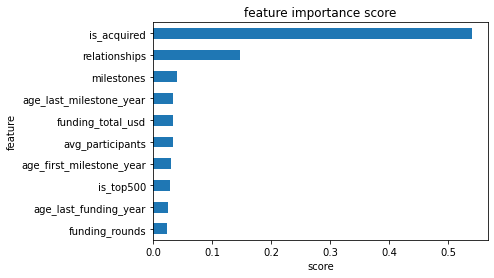

In [128]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
ax = importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### KNN Model

In [140]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train_transformed, y_train_res)

# Score
score_knn = knn_model.score(X_test_norm, y_test)
score_knn

0.7295712809917355

### Comparing all models:

In [141]:
pd.DataFrame({ 'Logistic Regression classification' : [Logistic_Regression_classification_accuracy],        
              'Decision_Tree': [decision_tree_accuracy],
              'Random_Forest': [random_forest_accuracy],
              'KNN Regression': [score_knn]})

,Logistic Regression classification,Decision_Tree,Random_Forest,KNN Regression
0,0.994595,0.994595,0.994595,0.729571
